# **Purchase Likelihood**

---

**Superstore Marketing Campaign Dataset**

from kaggle datasets

Context : a superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only 499 dollars which is 999 dollars on other days. It will be valid for only existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make predictive model which will classify customers who might purchase the offer.

Datasets description

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

ID - Unique ID of each customer

Year_Birth - Age of the customer

Complain - 1 if the customer complained in the last 2 years

Dt_Customer - date of customer's enrollment with the company

Education - customer's level of education

Marital - customer's marital status

Kidhome - number of small children in customer's household

Teenhome - number of teenagers in customer's household

Income - customer's yearly household income

MntFishProducts - the amount spent on fish products in the last 2 years

MntMeatProducts - the amount spent on meat products in the last 2 years

MntFruits - the amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - the amount spent on wine products in the last 2 years


MntGoldProds - the amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalog (buying goods to
be shipped through the mail)

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through the company's website

NumWebVisitsMonth - number of visits to company's website in the last month

Recency - number of days since the last purchase

In [26]:
# import relevant library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/superstore_data.csv')

In [4]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
# Switch type of Date in feature 'Dt_Customer'

df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer).dt.to_period('M')

In [8]:
df.Dt_Customer.sort_values()

2239    2012-01
738     2012-01
1375    2012-01
1398    2012-01
1435    2012-01
         ...   
504     2014-12
479     2014-12
478     2014-12
950     2014-12
52      2014-12
Name: Dt_Customer, Length: 2240, dtype: period[M]

In [9]:
# Assign null-value of feature 'Income' with median

df.loc[df.Income.isnull(), 'Income'] = np.nanmedian(df.Income)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   Id                   2240 non-null   int64    
 1   Year_Birth           2240 non-null   int64    
 2   Education            2240 non-null   object   
 3   Marital_Status       2240 non-null   object   
 4   Income               2240 non-null   float64  
 5   Kidhome              2240 non-null   int64    
 6   Teenhome             2240 non-null   int64    
 7   Dt_Customer          2240 non-null   period[M]
 8   Recency              2240 non-null   int64    
 9   MntWines             2240 non-null   int64    
 10  MntFruits            2240 non-null   int64    
 11  MntMeatProducts      2240 non-null   int64    
 12  MntFishProducts      2240 non-null   int64    
 13  MntSweetProducts     2240 non-null   int64    
 14  MntGoldProds         2240 non-null   int64    
 15  NumD

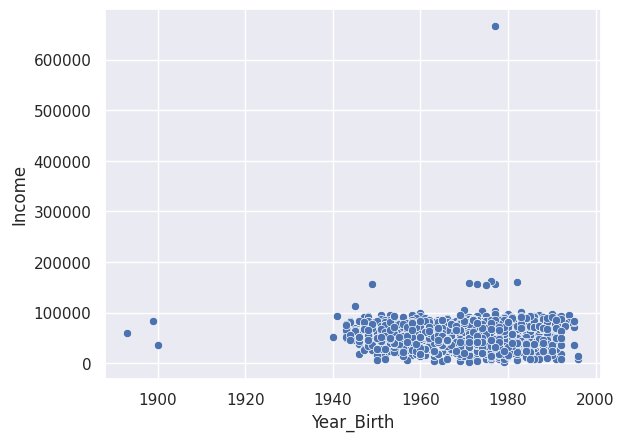

In [11]:
fig, ax = plt.subplots()

sns.scatterplot(df, x='Year_Birth', y='Income', ax=ax)
plt.show()

In [12]:
df.drop(df.index[df.Year_Birth <= 1900], inplace=True)
df.drop(df.index[df.Income > 300000], inplace=True)

In [13]:
df.columns.values

array(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'Complain'], dtype=object)

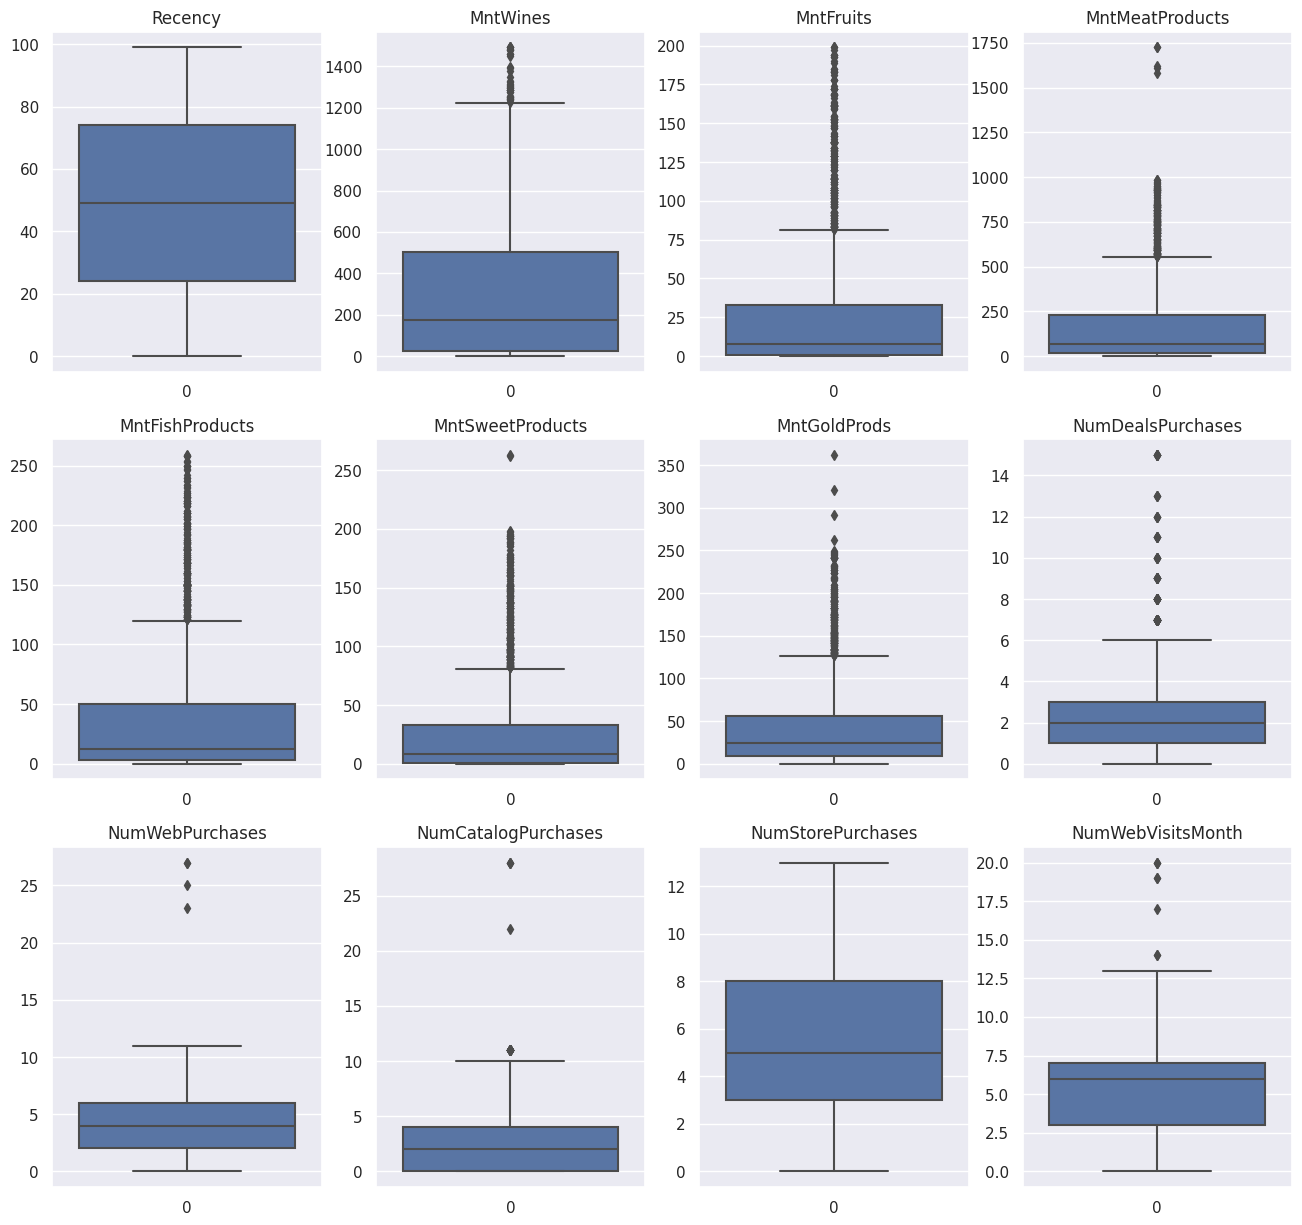

In [14]:
list_boxplots = ['Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16,15))

cont = 0
for i in range(3):
  for j in range(4):
    sns.boxplot(df[list_boxplots[cont]], ax=ax[i][j])
    ax[i][j].set_title(list_boxplots[cont])
    cont += 1

In [16]:
df.drop(df.index[df.MntMeatProducts > 1200], inplace=True)
df.drop(df.index[df.MntSweetProducts > 240], inplace=True)
df.drop(df.index[df.MntGoldProds > 270], inplace=True)

# **Exploratory Data Analysis**

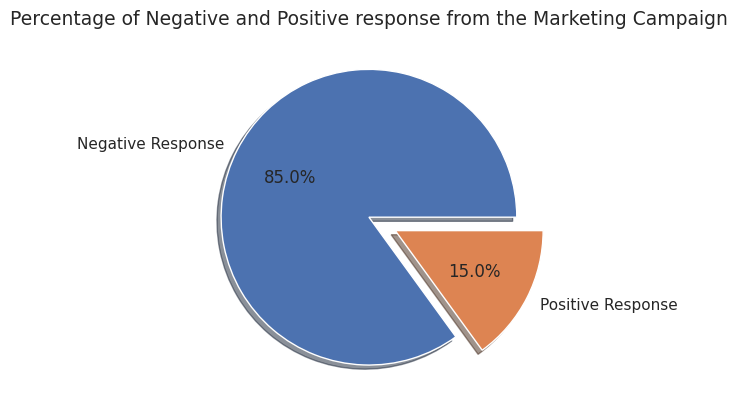

In [17]:
fig, ax = plt.subplots()

ax.pie(
    df.Response.value_counts().values,
    labels=['Negative Response', 'Positive Response'],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    )
ax.set_title('Percentage of Negative and Positive response from the Marketing Campaign', fontsize=13.5)
plt.show()

We have unbalanced dataset with only 15% of customers providing a positive response, we need balance the dataset to avoid favoring the majority class

In [18]:
response_date = df.groupby('Dt_Customer')['Response'].mean().reset_index()
response_date['Dt_Customer'] = response_date.Dt_Customer.astype(str)

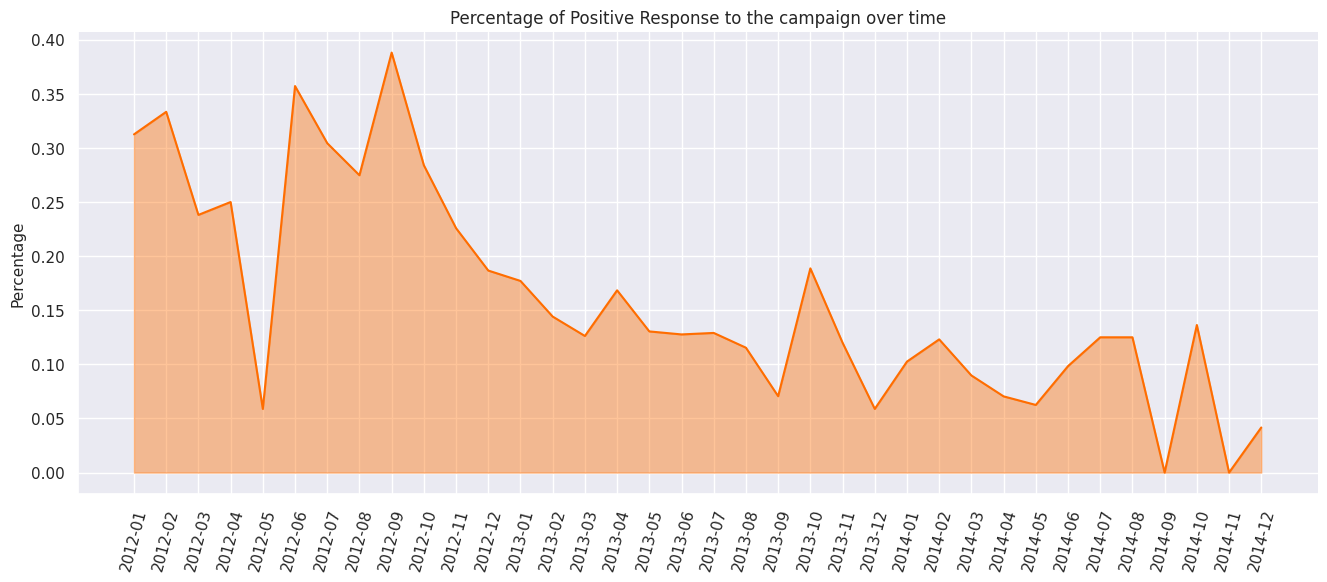

In [19]:
fig, ax = plt.subplots(figsize=(16,6))

plt.plot(response_date['Dt_Customer'], response_date['Response'], color='#ff6d00')
plt.fill_between(response_date['Dt_Customer'], response_date['Response'], color='#ff6d00', alpha=0.4)

ax.tick_params(axis='x', rotation=75)
ax.spines[['top', 'right']].set_visible(False)

ax.set_title('Percentage of Positive Response to the campaign over time', fontsize=12)
ax.set_ylabel('Percentage', fontsize=11)

plt.show()

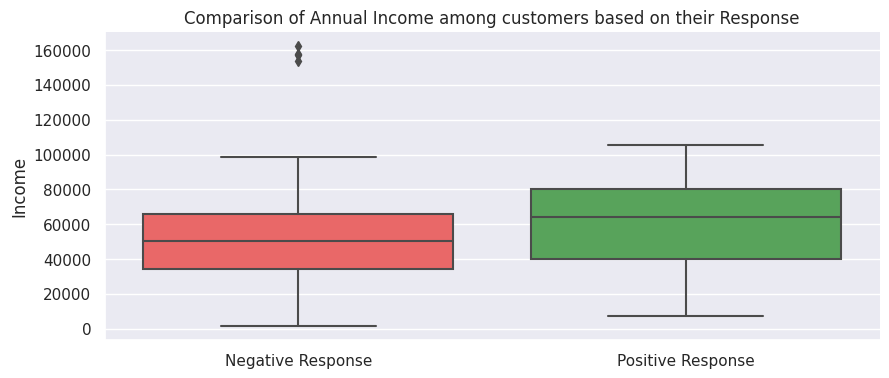

In [20]:
fig, ax = plt.subplots(figsize=(10,4))

sns.boxplot(df, x='Response', y='Income', ax=ax, palette=['#FF5252', '#4CAF50'])

ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Comparison of Annual Income among customers based on their Response')

ax.set_xticklabels(['Negative Response', 'Positive Response'])
ax.set_xlabel('')

plt.show()

In [21]:
categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']

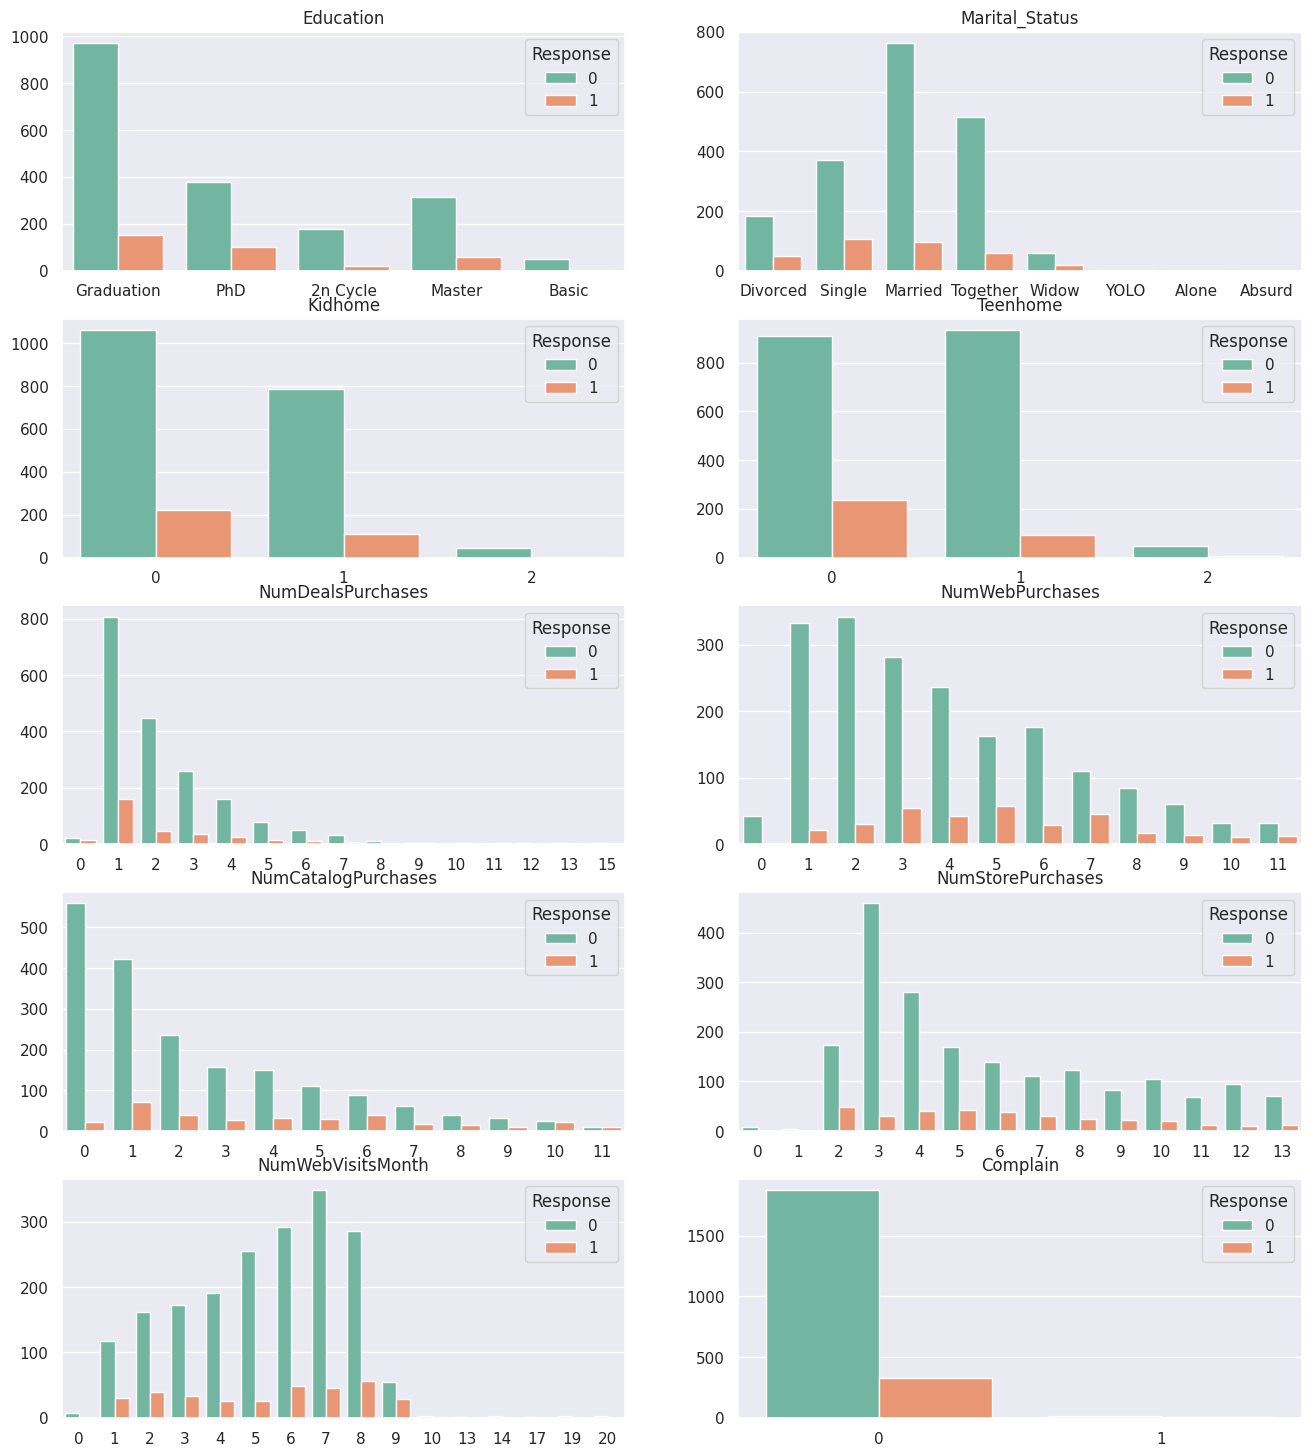

In [22]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(16,18))

cont = 0
for i in range(5):
  for j in range(2):
    sns.countplot(df, x=categorical_cols[cont], hue='Response', ax=ax[i][j], palette='Set2')

    ax[i][j].set_title(categorical_cols[cont])
    ax[i][j].set_ylabel('')
    ax[i][j].set_xlabel('')

    cont += 1

plt.show()

In [23]:
continuous_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

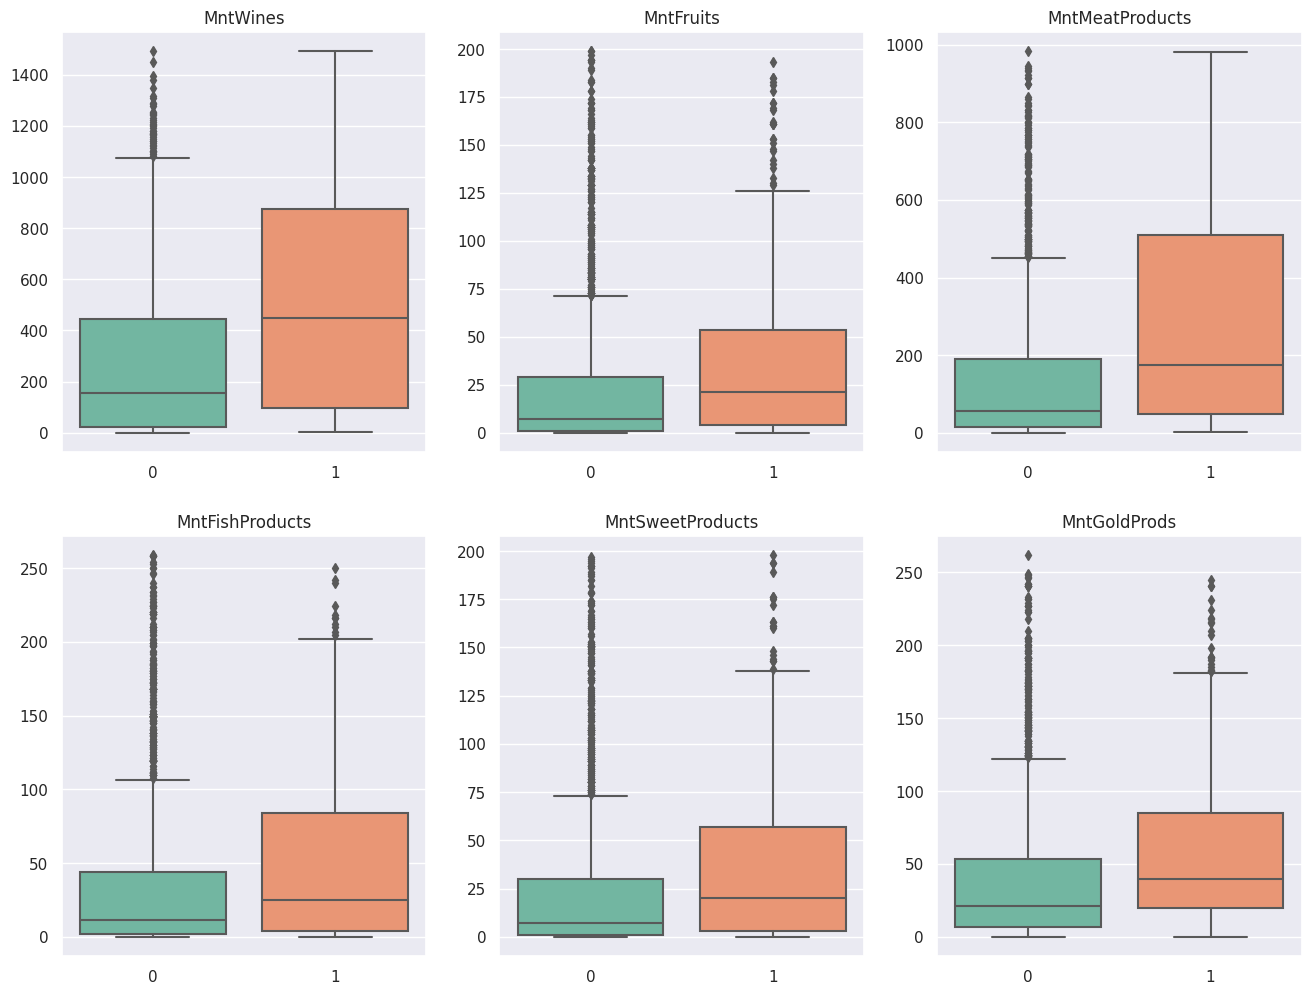

In [25]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16,12))

cont = 0
for i in range(2):
  for j in range(3):
    sns.boxplot(df, y=continuous_cols[cont], x='Response', ax=ax[i][j], palette='Set2')

    ax[i][j].set_title(continuous_cols[cont])
    ax[i][j].set_ylabel('')
    ax[i][j].set_xlabel('')

    cont += 1

plt.show()

# **Preprocessing and Modelling**

---



In [27]:
#Preprocessing

In [29]:
# convert date column into integer numbers

sorted_df = sorted([str(val) for val in df.Dt_Customer.unique()])

df['Dt_Customer'] = df.Dt_Customer.apply(lambda val: sorted_df.index(str(val)))

In [30]:
df.drop('Id', axis=1, inplace=True)

In [31]:
df = pd.get_dummies(df)

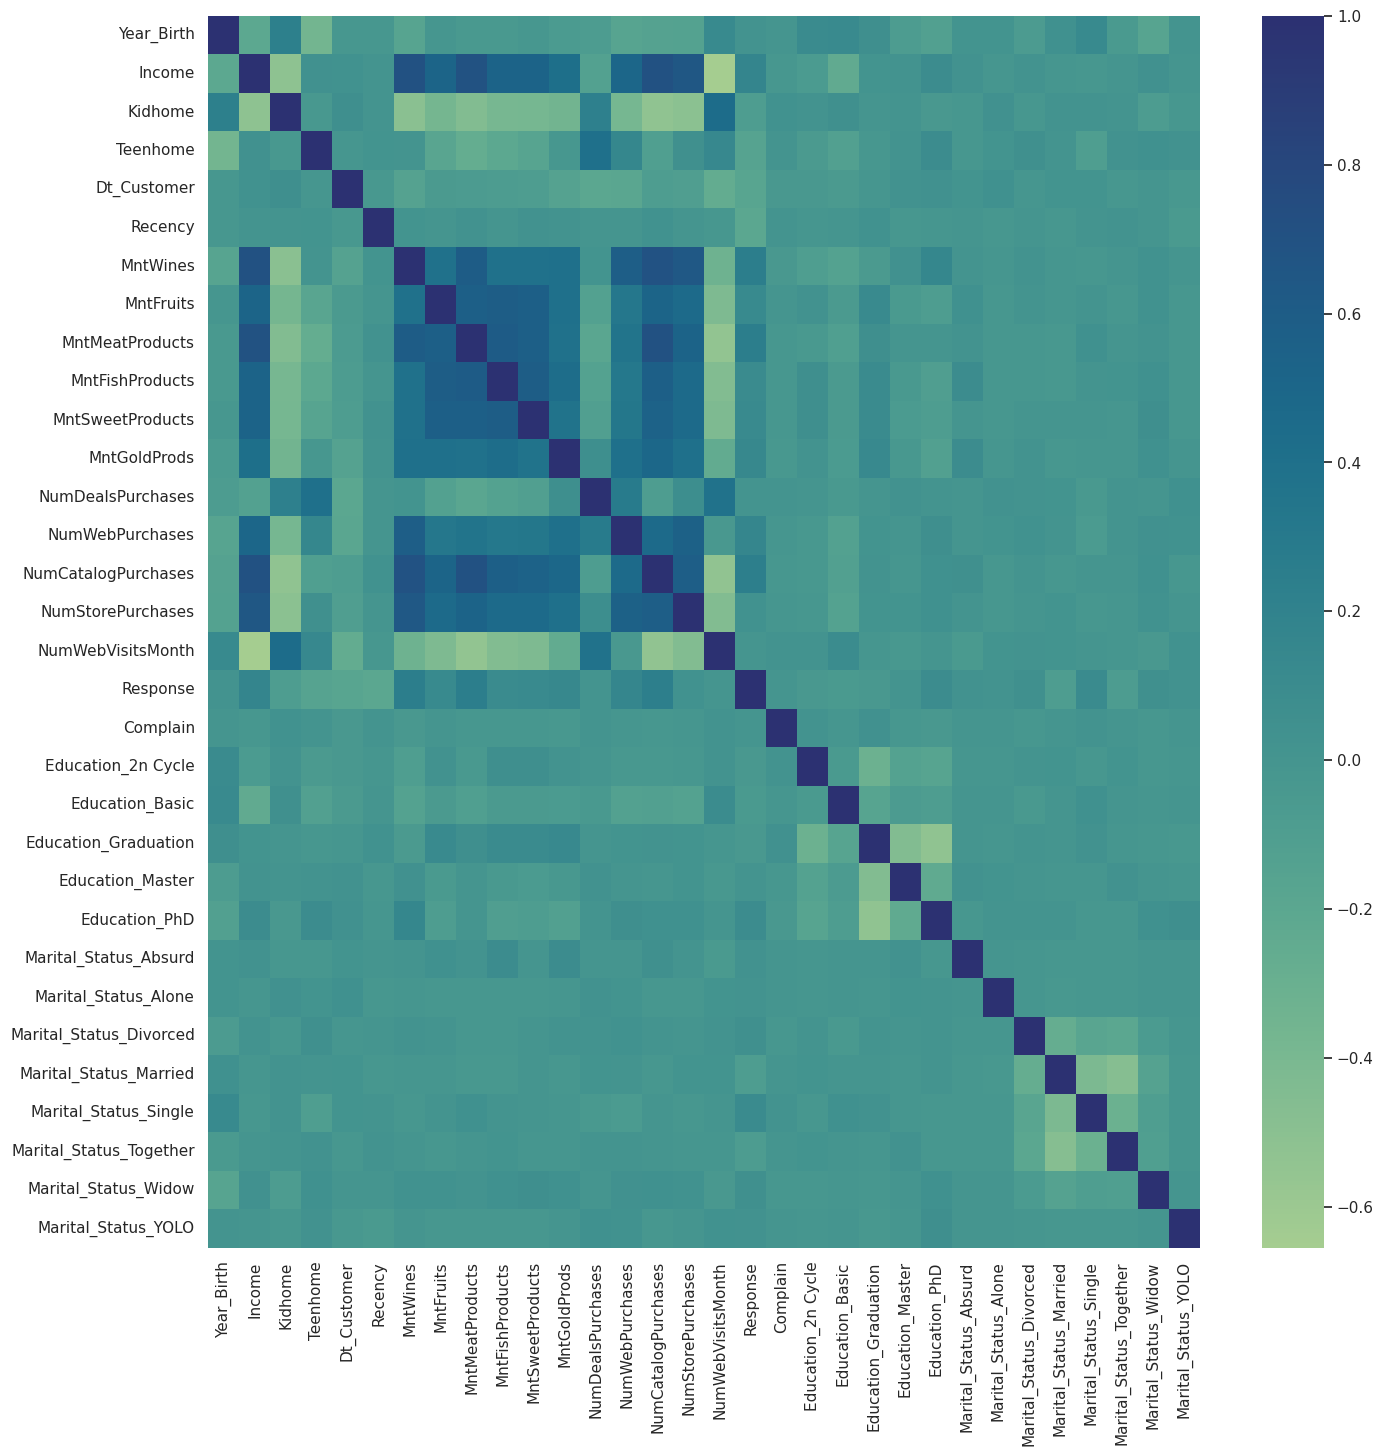

In [32]:
# Correlation heatmap

fig, ax = plt.subplots(figsize=(16,16))

sns.heatmap(df.corr(), ax=ax, cmap='crest')

plt.show()

In [33]:
  #Before modelling
  #standardize the data
  #balance the data
  #split data into train and test

In [35]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [36]:
X = df.drop('Response', axis=1)
y = df.Response

X.shape, y.shape

((2227, 31), (2227,))

In [37]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X)

In [38]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)

X_resampled.shape, y_resampled.shape

((3786, 31), (3786,))

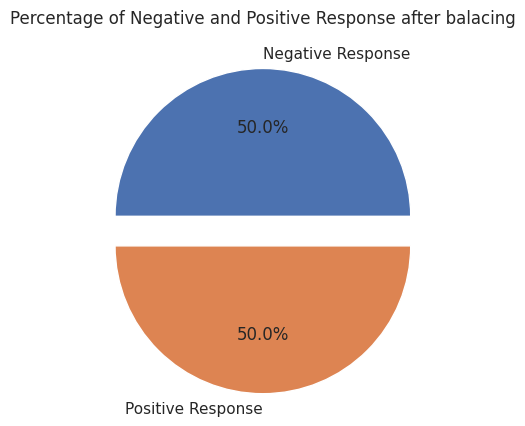

In [44]:
fig, ax = plt.subplots()

ax.pie(
       y_resampled.value_counts().values,
       labels=['Negative Response', 'Positive Response'],
       autopct="%1.1f%%",
       explode=(0, 0.2),
       shadow=False,
       )

ax.set_title('Percentage of Negative and Positive Response after balacing', fontsize=12)
plt.show()

In [46]:
#split dataset

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3028, 31), (758, 31), (3028,), (758,))

# **Modeling and Evaluation**

---

fit model and tuning hyperparameter

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [50]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)

In [52]:
models_evaluation = pd.DataFrame({
    'Model' : [],
    'Precision': [],
    'Recall' : [],
    'Accuracy': []
})

In [53]:
def concat_evaluations(df, y_pred, model):
  new_model = pd.DataFrame({
      'Model': [model],
      'Precision': [precision_score(y_pred=y_pred, y_true=y_test)],
      'Recall': [recall_score(y_pred=y_pred, y_true=y_test)],
      'Accuracy': [accuracy_score(y_pred=y_pred, y_true=y_test)]
  })

  models_evaluation = pd.concat([df, new_model], axis=0, ignore_index=True)

  return models_evaluation

# **Decision Tree Classifier**

In [54]:
tree_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2,3,5]
}

clf_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=tree_params,
    scoring='accuracy',
    cv=kf
)

clf_tree.fit(X_train, y_train)

print(f"Best hyperparameter of Decision Tree Classifier : \n{clf_tree.best_estimator_}")

Best hyperparameter of Decision Tree Classifier : 
DecisionTreeClassifier(criterion='entropy', min_samples_split=3)


In [55]:
scores_tree = cross_val_score(clf_tree, X_train, y_train, cv=kf, scoring='accuracy')

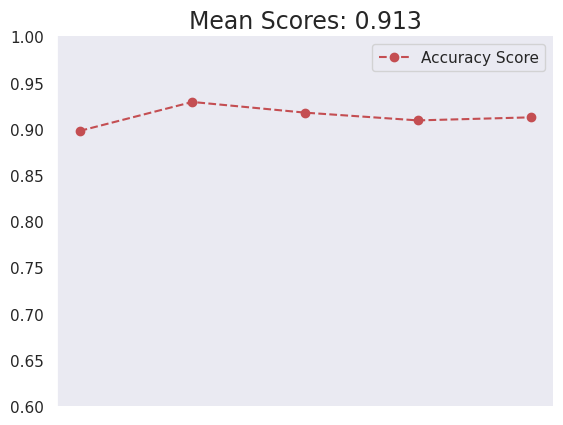

In [56]:
fig, ax = plt.subplots()

ax.plot(scores_tree, 'o--r', label='Accuracy Score')
ax.set_title(f'Mean Scores: {np.mean(scores_tree):.3f}', fontsize=17)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

In [57]:
y_pred_tree = clf_tree.predict(X_test)

In [59]:
cm_tree = confusion_matrix(y_pred=y_pred_tree, y_true=y_test)

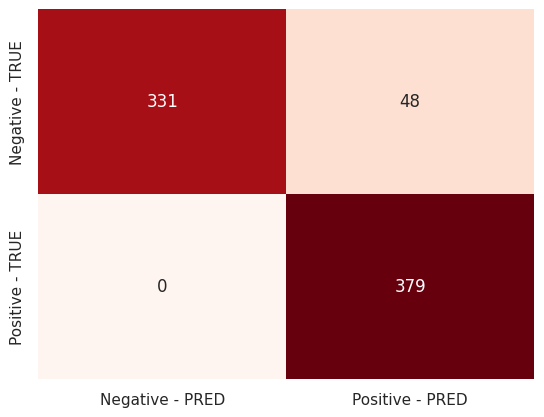

In [63]:
fig, ax = plt.subplots()

sns.heatmap(cm_tree, ax=ax, cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negative - PRED', 'Positive - PRED'],
            yticklabels=['Negative - TRUE', 'Positive - TRUE'])
plt.show()

# **Logistic Regression**


In [64]:
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['saga', 'liblinear']
}

In [65]:
clf_lr = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=lr_params,
    scoring='accuracy',
    cv=kf
)

clf_lr.fit(X_train, y_train)

print(f'Best hyperparameter of Logistic Regression Model: \n{clf_lr.best_estimator_}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best hyperparameter of Logistic Regression Model: 
LogisticRegression(C=0.01, solver='liblinear')


In [66]:
scores_lr = cross_val_score(clf_lr, X_train, y_train, cv=kf, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

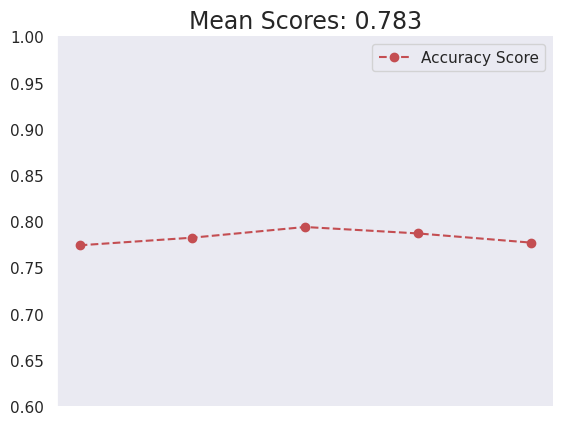

In [70]:
fig, ax = plt.subplots()

ax.plot(scores_lr, 'o--r', label='Accuracy Score')

ax.set_title(f'Mean Scores: {np.mean(scores_lr):.3f}', fontsize=17)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

In [71]:
y_pred_lr = clf_lr.predict(X_test)

In [72]:
cm_lr = confusion_matrix(y_pred=y_pred_lr, y_true=y_test)

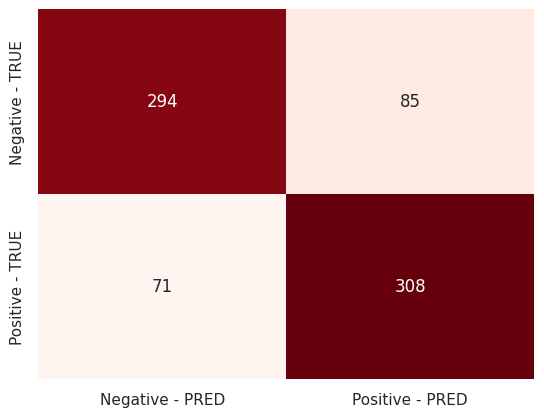

In [73]:
fig, ax = plt.subplots()

sns.heatmap(cm_lr, ax=ax, cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negative - PRED', 'Positive - PRED'],
            yticklabels=['Negative - TRUE', 'Positive - TRUE'])

plt.show()

In [74]:
models_evaluation = concat_evaluations(models_evaluation, y_pred_lr, 'LogisticRegression')

# **Random Forest Classifier**



In [75]:
rf_params = {
    'n_estimators': [70, 90, 110],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,3,5]
}

In [77]:
clf_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=rf_params,
    scoring='accuracy',
    cv=kf
)

clf_rf.fit(X_train, y_train)
print(f'Best hyperparameter of Random Forest Classifier: \n{clf_rf.best_estimator_}')

Best hyperparameter of Random Forest Classifier: 
RandomForestClassifier(n_estimators=90)


In [79]:
scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=kf, scoring='accuracy')

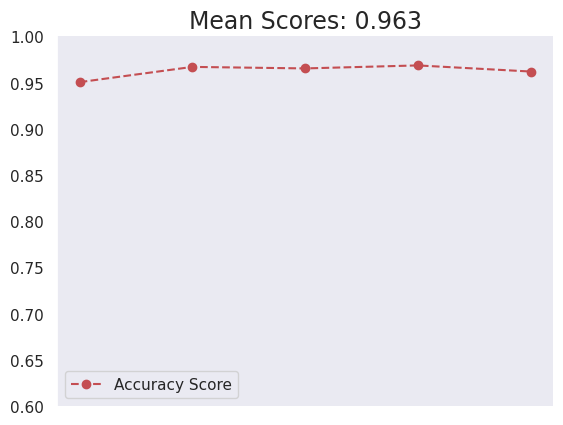

In [80]:
fig, ax = plt.subplots()

ax.plot(scores_rf, 'o--r', label='Accuracy Score')

ax.set_title(f'Mean Scores: {np.mean(scores_rf):.3f}', fontsize=17)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

In [81]:
y_pred_rf = clf_rf.predict(X_test)

In [82]:
cm_rf = confusion_matrix(y_pred=y_pred_rf, y_true=y_test)

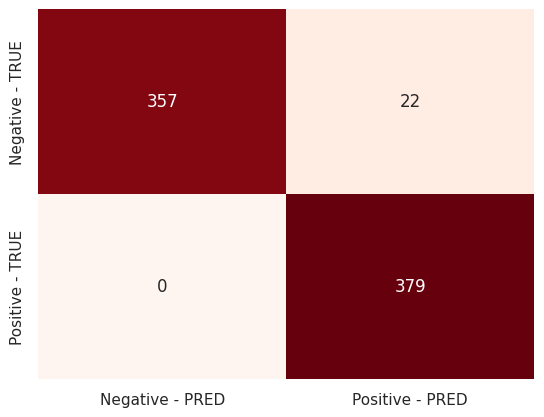

In [83]:
fig, ax = plt.subplots()

sns.heatmap(cm_rf, ax=ax, cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negative - PRED', 'Positive - PRED'],
            yticklabels=['Negative - TRUE', 'Positive - TRUE'])

plt.show()

In [84]:
models_evaluation = concat_evaluations(models_evaluation, y_pred_rf, 'RandomForest')

# **KNN**

In [85]:
knn_params = {
    "n_neighbors": [3, 5, 10],
    "weights": ['uniform', 'distance']
}

In [86]:
clf_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=knn_params,
    scoring='accuracy',
    cv=kf
)

clf_knn.fit(X_train, y_train)

print(f"Best hiperparams of KNN: \n{clf_knn.best_estimator_}")

Best hiperparams of KNN: 
KNeighborsClassifier(n_neighbors=3, weights='distance')


In [87]:
scores_knn = cross_val_score(clf_knn, X_train, y_train, cv=kf, scoring='accuracy')

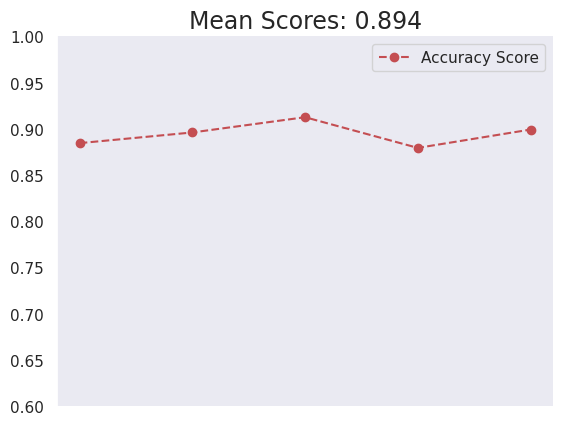

In [88]:
fig, ax = plt.subplots()

ax.plot(scores_knn, 'o--r', label='Accuracy Score')

ax.set_title(f'Mean Scores: {np.mean(scores_knn):.3f}', fontsize=17)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

In [89]:
y_pred_knn = clf_knn.predict(X_test)

In [90]:
cm_knn = confusion_matrix(y_pred=y_pred_knn, y_true=y_test)

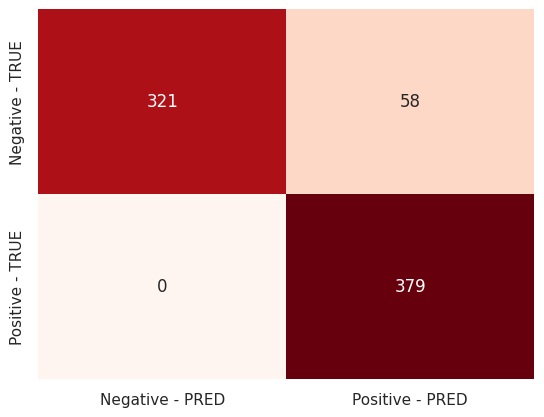

In [91]:
fig, ax = plt.subplots()

sns.heatmap(cm_knn, ax=ax, cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negative - PRED', 'Positive - PRED'],
            yticklabels=['Negative - TRUE', 'Positive - TRUE'])

plt.show()

In [92]:
models_evaluation = concat_evaluations(models_evaluation, y_pred_knn, 'KNN')

# **SVC**

In [93]:
svc_params = {
    "C": [0.01, 0.1, 1, 10],
    "gamma": ['scale', 'auto']
}

In [94]:
clf_svc = GridSearchCV(
    estimator=SVC(),
    param_grid=svc_params,
    scoring='accuracy',
    cv=kf
)

clf_svc.fit(X_train, y_train)

print(f"Best hiperparams of SVC: \n{clf_svc.best_estimator_}")

Best hiperparams of SVC: 
SVC(C=10, gamma='auto')


In [95]:
scores_svc = cross_val_score(clf_svc, X_train, y_train, cv=kf, scoring='accuracy')

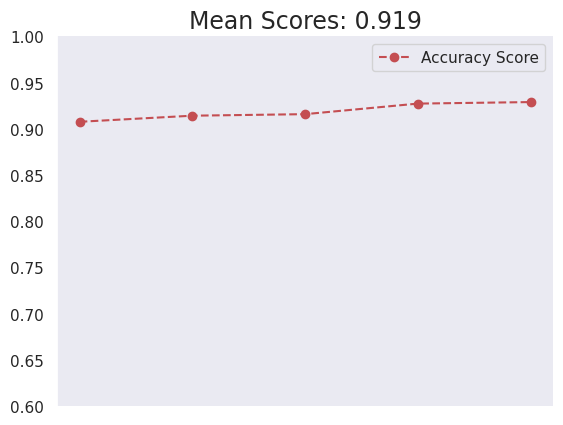

In [96]:
fig, ax = plt.subplots()

ax.plot(scores_svc, 'o--r', label='Accuracy Score')

ax.set_title(f'Mean Scores: {np.mean(scores_svc):.3f}', fontsize=17)

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

In [97]:
y_pred_svc = clf_svc.predict(X_test)

In [98]:
cm_svc = confusion_matrix(y_pred=y_pred_svc, y_true=y_test)

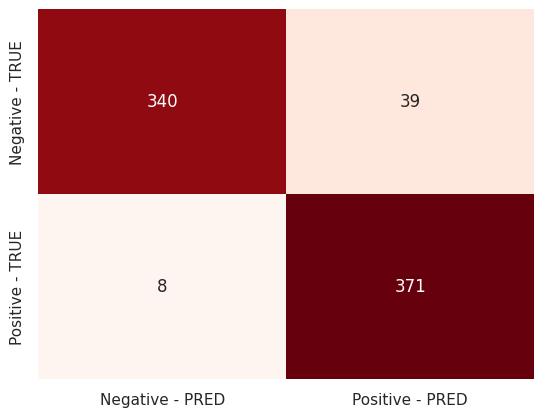

In [99]:
fig, ax = plt.subplots()

sns.heatmap(cm_svc, ax=ax, cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negative - PRED', 'Positive - PRED'],
            yticklabels=['Negative - TRUE', 'Positive - TRUE'])

plt.show()

In [100]:
models_evaluation = concat_evaluations(models_evaluation, y_pred_svc, 'SVC')

# **Model Evaluation**

In [101]:
models_evaluation.sort_values(by='Accuracy', ascending=False)

,Model,Precision,Recall,Accuracy
1,RandomForest,0.945137,1.000000,0.970976
3,SVC,0.904878,0.978892,0.937995
2,KNN,0.867277,1.000000,0.923483
0,LogisticRegression,0.783715,0.812665,0.794195


In [103]:
models_evaluation.sort_values(by='Accuracy', ascending=False)

,Model,Precision,Recall,Accuracy
1,RandomForest,0.945137,1.000000,0.970976
3,SVC,0.904878,0.978892,0.937995
4,DecisionTree,0.887588,1.000000,0.936675
2,KNN,0.867277,1.000000,0.923483
0,LogisticRegression,0.783715,0.812665,0.794195


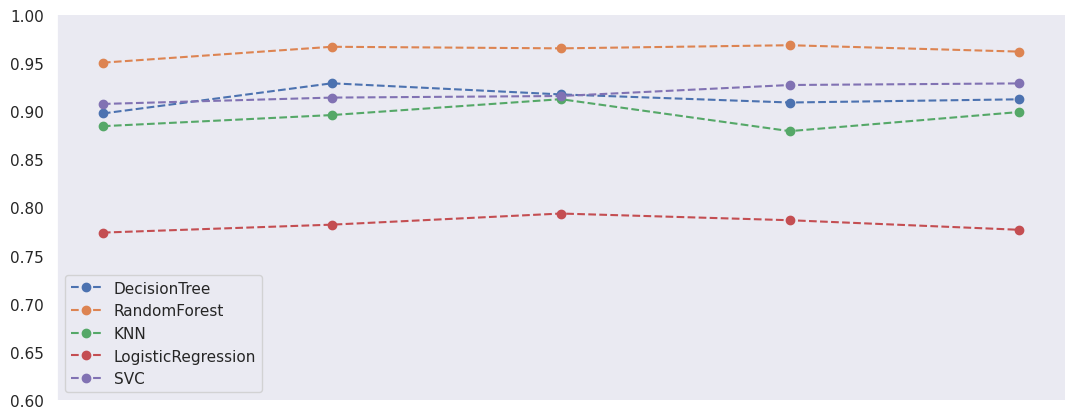

In [104]:
fig, ax = plt.subplots(figsize=(13, 5))

ax.plot(scores_tree, 'o--', label='DecisionTree')
ax.plot(scores_rf, 'o--', label='RandomForest')
ax.plot(scores_knn, 'o--', label='KNN')
ax.plot(scores_lr, 'o--', label='LogisticRegression')
ax.plot(scores_svc, 'o--', label='SVC')

ax.spines[['top', 'right', 'bottom']].set_visible(False)
ax.set_ylim(0.6, 1)
ax.xaxis.set_visible(False)
ax.legend()

plt.grid()
plt.show()

# **Conclusion**



*   The best model performance is **Random Forest**
*   The worst model performance is **Logistic Regression**

